Importing necessary libraries

In [220]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, quantile_transform
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

Loading CSV File

In [221]:
df = pd.read_csv(r'E:/MBAN/Sem II/Predictive Modeling/Predictive Modeling/For Hackathon/data_set_hackathon.csv')

Display the first five rows of the dataframe

In [222]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001


Provide concise summary of the dataframe, like column names, non-null values and datatype

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


Change the datatype of the columns

In [224]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y')
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'], format='%d.%m.%Y')

Checking if the datatypes are changed or not

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   object        
 10  Route                    2420 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 208.1+ KB


Analyzing and Handling missing values

In [226]:
# Calculate the total number of missing values for each columns in the dataframe
nan_values = df.isna().sum()

# Print the header to show that the output is representing null values
print("NaN values per column:")

# Print the series that contains the count of null values for each column
print(nan_values)

NaN values per column:
order_date                 0
requested_delivery_date    0
Customer Country Code      0
Product Code               0
Description                0
order_type                 0
Customer Order Code        0
value                      0
Curr                       0
items                      0
Route                      0
dtype: int64


Remove duplicates

In [227]:
df.drop_duplicates(inplace=True)

Checking if the duplicates are removed or not

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2417 non-null   datetime64[ns]
 1   requested_delivery_date  2417 non-null   datetime64[ns]
 2   Customer Country Code    2417 non-null   object        
 3   Product Code             2417 non-null   object        
 4   Description              2417 non-null   object        
 5   order_type               2417 non-null   object        
 6   Customer Order Code      2417 non-null   int64         
 7   value                    2417 non-null   float64       
 8   Curr                     2417 non-null   object        
 9   items                    2417 non-null   object        
 10  Route                    2417 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 226.6+ KB


In [229]:
# Replace '\\N' with NaN (if not already recognized as missing values)
df['items'] = df['items'].replace('\\N', pd.NA)

# Drop rows where 'Items' column has missing values
df = df.dropna(subset=['items'])

# If 'Items' is numeric, ensure proper conversion
df['items'] = pd.to_numeric(df['items'], errors='coerce')

# Display the cleaned DataFrame
print(df)


     order_date requested_delivery_date Customer Country Code Product Code  \
0    2009-07-13              2010-01-28                    RU    L10705000   
1    2009-07-15              2010-03-24                    RU    L10705000   
2    2009-07-16              2010-02-04                    RU    L10705000   
3    2009-07-17              2010-02-04                    RU    L10705000   
4    2009-07-21              2010-02-01                    RU    L10705000   
...         ...                     ...                   ...          ...   
2415 2011-07-13              2012-02-15                    HR    L12919200   
2416 2011-07-13              2012-02-15                    HR    L12919200   
2417 2011-07-13              2012-02-15                    HR    L12919200   
2418 2011-07-13              2012-02-15                    HR    L12919200   
2419 2012-01-23              2012-04-15                    RU    L12919200   

                      Description order_type  Customer Order Co

Feature Engineering

In [230]:
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Delivery Month'] = df['requested_delivery_date'].dt.month
df['Season'] = df['Delivery Month'].apply(month_to_season)

df['Lead Time'] = (df['requested_delivery_date'] - df['order_date']).dt.days

df['advanced_order'] = (df['Lead Time'] >= 30).astype(int)

df['Season_Num'] = df['Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4})

In [231]:
#df['Estimated_Price'] = df.groupby('Product Code')['value'].transform(lambda x: x.shift().expanding().mean())
#df['Estimated_Price'].fillna(df.groupby('Product Code')['value'].transform('mean'), inplace=True)
#df[['order_date', 'Product Code', 'value', 'Estimated_Price']].head(50)


In [232]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,2,Winter,217,1,1
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,2,Winter,217,1,1
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,2,Winter,217,1,1
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,2,Winter,217,1,1


In [233]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1


In [234]:
df['year_month'] = df['order_date'].dt.to_period('M')

In [235]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,2,Winter,217,1,1,2011-07


In [236]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07


Q. No. 1

In [237]:
# Count distinct Customer Order Codes for each month
monthly_orders = df.groupby('year_month')['Customer Order Code'].nunique().reset_index()
monthly_orders.columns = ['year_month', 'Distinct Orders']

In [238]:
# Convert 'YearMonth' to datetime format for time series analysis
monthly_orders['year_month'] = pd.to_datetime(monthly_orders['year_month'].astype(str))
monthly_orders.set_index('year_month', inplace=True)

In [239]:
monthly_orders

,Distinct Orders
year_month,
2009-07-01,37
2009-08-01,5
2009-09-01,9
2009-10-01,2
2009-11-01,2
2009-12-01,21
2010-01-01,28
2010-02-01,36
2010-03-01,42


In [240]:
# Step 3: Check Stationarity using Augmented Dickey-Fuller (ADF) Test
result = adfuller(monthly_orders['Distinct Orders'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Data is not stationary. Differencing will be applied.")
    monthly_orders['Distinct Orders Diff'] = monthly_orders['Distinct Orders'].diff().dropna()

ADF Statistic: -3.59241149910783
p-value: 0.005907771862762449


In [241]:
monthly_orders

,Distinct Orders
year_month,
2009-07-01,37
2009-08-01,5
2009-09-01,9
2009-10-01,2
2009-11-01,2
2009-12-01,21
2010-01-01,28
2010-02-01,36
2010-03-01,42


                               SARIMAX Results                                
Dep. Variable:        Distinct Orders   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -137.185
Date:                Sun, 08 Dec 2024   AIC                            280.370
Time:                        23:13:49   BIC                            284.144
Sample:                             0   HQIC                           281.457
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5402      0.338      1.597      0.110      -0.123       1.203
ma.L1         -0.9961      4.389     -0.227      0.820      -9.598       7.606
sigma2      2069.1634   8525.534      0.243      0.8

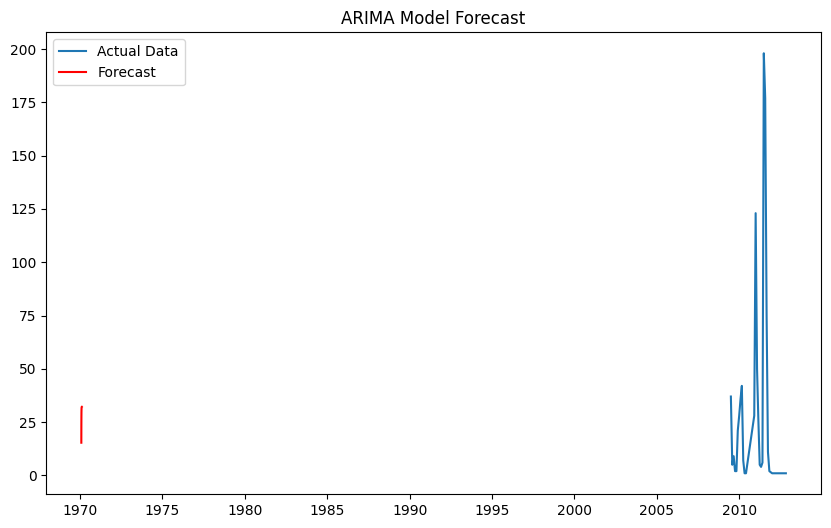

In [242]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data for ARIMA
# Assuming `monthly_orders` is a DataFrame containing monthly aggregated order data
# Replace 'Distinct Orders' with the appropriate column name in your dataset
arima_data = monthly_orders['Distinct Orders']

# Step 2: Fit the ARIMA model
# Define the ARIMA model with (p, d, q) parameters. Modify these parameters based on data behavior.
arima_model = ARIMA(arima_data, order=(1, 1, 1))  # Example: ARIMA(1, 1, 1)
arima_results = arima_model.fit()

# Step 3: Summary of the ARIMA model
print(arima_results.summary())

# Step 4: Make predictions
# Forecast the next 12 periods
forecast = arima_results.forecast(steps=12)
print("ARIMA Forecast for the next 12 periods:")
print(forecast)

# Step 5: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arima_data, label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()


In [243]:
forecast

27    15.337779
28    23.083195
29    27.267348
30    29.527671
31    30.748720
32    31.408343
33    31.764679
34    31.957175
35    32.061163
36    32.117339
37    32.147685
38    32.164079
Name: predicted_mean, dtype: float64

                               SARIMAX Results                                
Dep. Variable:        Distinct Orders   No. Observations:                   27
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -136.359
Date:                Sun, 08 Dec 2024   AIC                            278.718
Time:                        23:13:50   BIC                            282.374
Sample:                             0   HQIC                           279.732
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0891      0.231      0.386      0.700      -0.364       0.542
ma.L1         -0.9978      7.734     -0.129      0.897     -16.156      14.160
sigma2      2832.4394   2.15e+04      0.131      0.8

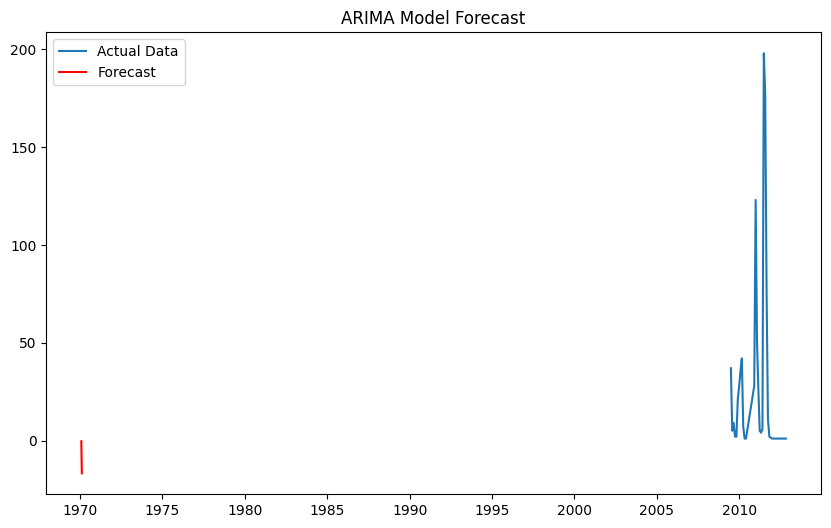

In [244]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data for ARIMA
# Assuming `monthly_orders` is a DataFrame containing monthly aggregated order data
# Replace 'Distinct Orders' with the appropriate column name in your dataset
arima_data = monthly_orders['Distinct Orders']

# Step 2: Fit the ARIMA model
# Define the ARIMA model with (p, d, q) parameters. Modify these parameters based on data behavior.
arima_model = ARIMA(arima_data, order=(1, 2, 1))  # Example: ARIMA(1, 2, 1)
arima_results = arima_model.fit()

# Step 3: Summary of the ARIMA model
print(arima_results.summary())

# Step 4: Make predictions
# Forecast the next 12 periods
forecast = arima_results.forecast(steps=12)
print("ARIMA Forecast for the next 12 periods:")
print(forecast)

# Step 5: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arima_data, label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()


                               SARIMAX Results                                
Dep. Variable:        Distinct Orders   No. Observations:                   27
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -139.665
Date:                Sun, 08 Dec 2024   AIC                            287.329
Time:                        23:13:50   BIC                            292.513
Sample:                             0   HQIC                           288.871
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2786     46.042      0.723      0.470     -56.963     123.520
ar.L1          0.2399      1.079      0.222      0.824      -1.876       2.355
ma.L1          0.4073      1.104      0.369      0.7

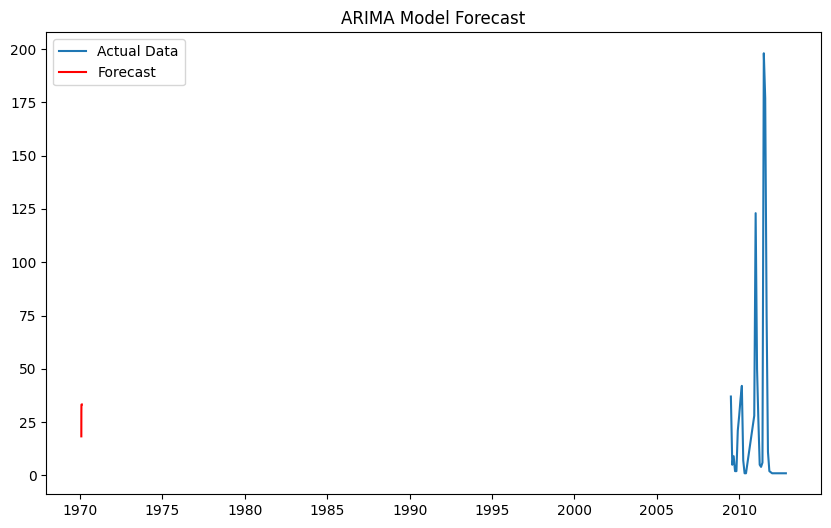

In [245]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data for ARIMA
# Assuming `monthly_orders` is a DataFrame containing monthly aggregated order data
# Replace 'Distinct Orders' with the appropriate column name in your dataset
arima_data = monthly_orders['Distinct Orders']

# Step 2: Fit the ARIMA model
# Define the ARIMA model with (p, d, q) parameters. Modify these parameters based on data behavior.
arima_model = ARIMA(arima_data, order=(1, 0, 1))  # Example: ARIMA(1, 0, 1)
arima_results = arima_model.fit()

# Step 3: Summary of the ARIMA model
print(arima_results.summary())

# Step 4: Make predictions
# Forecast the next 12 periods
forecast = arima_results.forecast(steps=12)
print("ARIMA Forecast for the next 12 periods:")
print(forecast)

# Step 5: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arima_data, label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()


In [246]:
# Import SARIMAX from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 4: Develop SARIMA Model
sarima_data = SARIMAX(monthly_orders['Distinct Orders'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_sarima = sarima_data.fit()

# Step 3: Display the SARIMAX results summary
print(results_sarima.summary())


                                     SARIMAX Results                                      
Dep. Variable:                    Distinct Orders   No. Observations:                   27
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -76.698
Date:                            Sun, 08 Dec 2024   AIC                            163.396
Time:                                    23:13:50   BIC                            166.592
Sample:                                         0   HQIC                           163.100
                                             - 27                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5742      1.998      0.287      0.774      -3.341       4.489
ma.L1         -0.9982    208.118   

In [247]:
# Step 5: Forecast the next 12 months
forecast = results_sarima.get_forecast(steps=12)
forecast_index = pd.date_range(start=monthly_orders.index[-1], periods=12, freq='M')
forecast_df = forecast.summary_frame()
forecast_df.index = forecast_index
forecast_mean = forecast.predicted_mean

In [248]:
forecast_mean

27     -8.945137
28    -11.269429
29      6.025327
30     12.343965
31     29.067801
32     33.527865
33     -4.976123
34    -14.112798
35    -15.020245
36      9.824081
37    103.556563
38     33.422422
Name: predicted_mean, dtype: float64

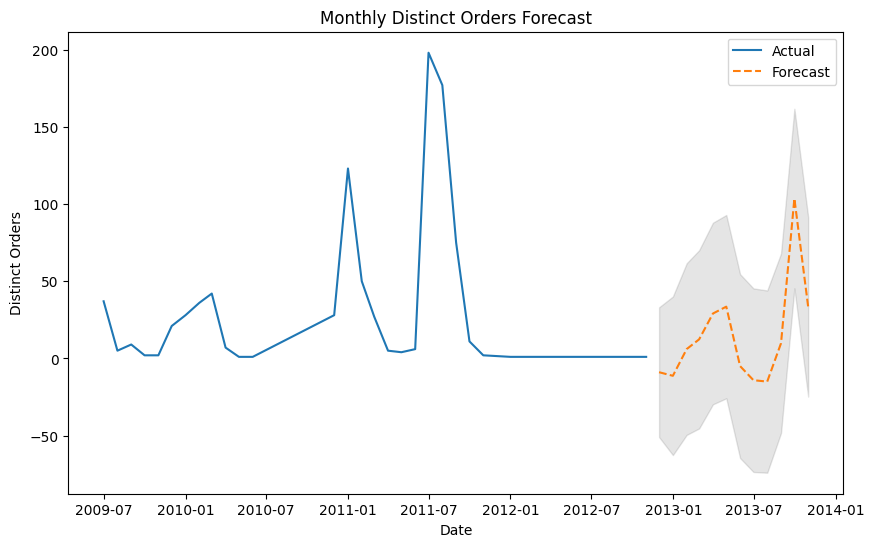

In [249]:
# Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders['Distinct Orders'], label="Actual")
plt.plot(forecast_df['mean'], label="Forecast", linestyle='--')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='k', alpha=0.1)
plt.title("Monthly Distinct Orders Forecast")
plt.xlabel("Date")
plt.ylabel("Distinct Orders")
plt.legend()
plt.show()

In [250]:
# Evaluate the model using MAPE
fitted_values = results_sarima.fittedvalues
mape = mean_absolute_percentage_error(monthly_orders['Distinct Orders'][1:], fitted_values[1:])
print(f"MAPE: {mape:.2%}")

MAPE: 620.52%


In [251]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07


In [255]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07


Q. No. 2

In [256]:

# Define features and target variable
features = ['Customer Country Code', 'Description', 'order_type', 'value', 'items', 'Route', 'Delivery Month', 'Season', 'Lead Time']
target = 'Product Code'

X = df[features]
y = df[target]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define categorical and numerical features
categorical_features = ['Customer Country Code', 'Description', 'order_type', 'Route', 'Season']
numerical_features = ['value', 'items', 'Lead Time']

# Define preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define RandomForestClassifier pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_pred_probs = model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

# Predict classes and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Add predicted probabilities to the original dataset
probabilities = model.predict_proba(X)
prob_cols = [f'prob_{code}' for code in le.classes_]
df_probs = pd.DataFrame(probabilities, columns=prob_cols, index=X.index)

df_with_probs = df.join(df_probs)

# Calculate average probabilities by season
if 'Season' in df_with_probs.columns:
    seasonal_choice_probabilities = df_with_probs.groupby('Season')[prob_cols].mean()
    print(seasonal_choice_probabilities)
else:
    print("Season column not found in the dataset.")


Log Loss: 12.7396
Accuracy: 0.1325
        prob_L10705000  prob_L10705100  prob_L10705200  prob_L10705300  \
Season                                                                   
Fall          0.000107        0.000050        0.000061        0.000043   
Spring        0.009411        0.001806        0.001486        0.005189   
Summer        0.000401        0.000067        0.000184        0.000167   
Winter        0.033637        0.023000        0.034423        0.038064   

        prob_L10705400  prob_L10705500  prob_L10705600  prob_L10705700  \
Season                                                                   
Fall          0.000078        0.000030        0.000071        0.000051   
Spring        0.003067        0.001230        0.004661        0.000021   
Summer        0.000017        0.000067        0.008562        0.005318   
Winter        0.054518        0.037750        0.057097        0.023931   

        prob_L10850600  prob_L10850700  ...  prob_L12918000  prob_L12918400

In [257]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 3 5]
 [0 0 0 ... 1 1 3]
 [0 0 0 ... 4 3 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.67      0.40      0.50         5
           5       0.00      0.00      0.00         3
           6       0.09      0.20      0.12         5
           7       0.00      0.00      0.00         2
           8       0.09      0.08      0.08        13
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         9
          11       0.25      0.20      0.22         5
          12       0.00      0.00      0.00         9
          13       0.11      0.17      0.13         6
          14       1.00   

In [258]:
X

,Customer Country Code,Description,order_type,value,items,Route,Delivery Month,Season,Lead Time
0,RU,Parka Outdoor Lifestyle STD,VO,2337.00,6,RU0001,1,Winter,199
1,RU,Parka Outdoor Lifestyle STD,VO,10160.25,23,RU0001,3,Spring,252
2,RU,Parka Outdoor Lifestyle STD,VO,2992.50,7,RU0001,2,Winter,203
3,RU,Parka Outdoor Lifestyle STD,VO,4061.25,9,RU0001,2,Winter,202
4,RU,Parka Outdoor Lifestyle STD,VO,2208.75,5,RU0001,2,Winter,195
...,...,...,...,...,...,...,...,...,...
2415,HR,Parka Outdoor Lifestyle STD,VO,128.52,12,FI0003,2,Winter,217
2416,HR,Parka Outdoor Lifestyle STD,VO,128.52,12,FI0003,2,Winter,217
2417,HR,Parka Outdoor Lifestyle STD,VO,128.52,12,FI0003,2,Winter,217
2418,HR,Parka Outdoor Lifestyle STD,VO,107.10,10,FI0003,2,Winter,217


In [259]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,2,Winter,217,1,1,2011-07


Q. No. 3

In [285]:
# Group by 'Product Code' and calculate the total quantity demanded
quantity_demanded = df.groupby('Product Code')['items'].sum().reset_index()

# Rename columns for clarity
quantity_demanded.rename(columns={'Product Code': 'Product', 'items': 'Total Quantity Demanded'}, inplace=True)

# Display the table
print(quantity_demanded)

      Product  Total Quantity Demanded
0   L10705000                      204
1   L10705100                       95
2   L10705200                      111
3   L10705300                      184
4   L10705400                      288
5   L10705500                      144
6   L10705600                      187
7   L10705700                       71
8   L10850600                      543
9   L10850700                       43
10  L10850800                      406
11  L10850900                      183
12  L10852800                      246
13  L10852900                      506
14  L10853100                       26
15  L12134400                      791
16  L12134500                      326
17  L12134600                      653
18  L12134700                      147
19  L12135800                     1097
20  L12135900                      312
21  L12136000                      155
22  L12136100                      615
23  L12916800                      303
24  L12916900            

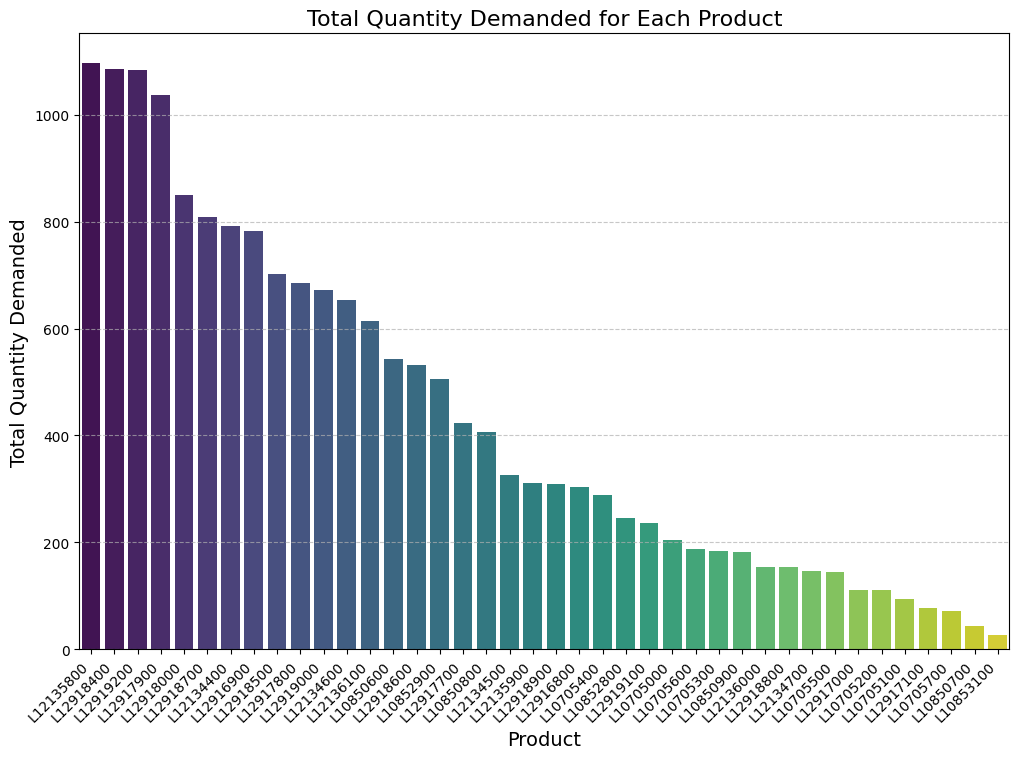

In [286]:
# Sort products by demand for visualization
quantity_demanded_sorted = quantity_demanded.sort_values(by='Total Quantity Demanded', ascending=False)

# Bar chart to visualize the total quantity demanded for each product
plt.figure(figsize=(12, 8))
sns.barplot(data=quantity_demanded_sorted, x='Product', y='Total Quantity Demanded', palette='viridis')
plt.title('Total Quantity Demanded for Each Product', fontsize=16)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Quantity Demanded', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [260]:
from scipy.stats.mstats import mquantiles

In [261]:
# Group by Product Code and compute quantiles for quantity demanded ('Items')
quantile_data = df.groupby('Product Code')['items'].apply(
    lambda x: pd.Series(mquantiles(x, prob=[0.25, 0.5, 0.75], alphap=0.4, betap=0.4), index=['25th', '50th', '75th'])
).unstack()

In [262]:
# Reset the index for better presentation
quantile_data = quantile_data.reset_index()

In [263]:
# Display the quantile data as a table
print(quantile_data)

   Product Code  25th  50th   75th
0     L10705000  5.00   6.0   8.00
1     L10705100  6.00   9.0  13.05
2     L10705200  5.00   6.0  10.00
3     L10705300  5.00   7.0  10.00
4     L10705400  6.00   9.0  15.80
5     L10705500  5.00   8.5  13.10
6     L10705600  5.00   7.5   8.00
7     L10705700  3.95   6.5   8.25
8     L10850600  3.00   5.0  10.00
9     L10850700  1.00   2.0   5.05
10    L10850800  2.45   4.0   6.00
11    L10850900  3.95   5.0  11.00
12    L10852800  2.00   4.0   8.00
13    L10852900  1.00   3.0   4.00
14    L10853100  4.40   6.0   6.00
15    L12134400  4.00   6.5  14.00
16    L12134500  2.00   6.0  10.30
17    L12134600  4.00   6.0  10.00
18    L12134700  2.95   5.0   9.05
19    L12135800  7.00   7.0   8.00
20    L12135900  3.00   5.0   7.00
21    L12136000  2.00   3.0   5.55
22    L12136100  6.00   7.0   7.00
23    L12916800  4.00   6.0  10.00
24    L12916900  4.00   5.0   6.00
25    L12917000  3.00   4.0   5.30
26    L12917100  4.00   4.0   5.55
27    L12917700  4.0

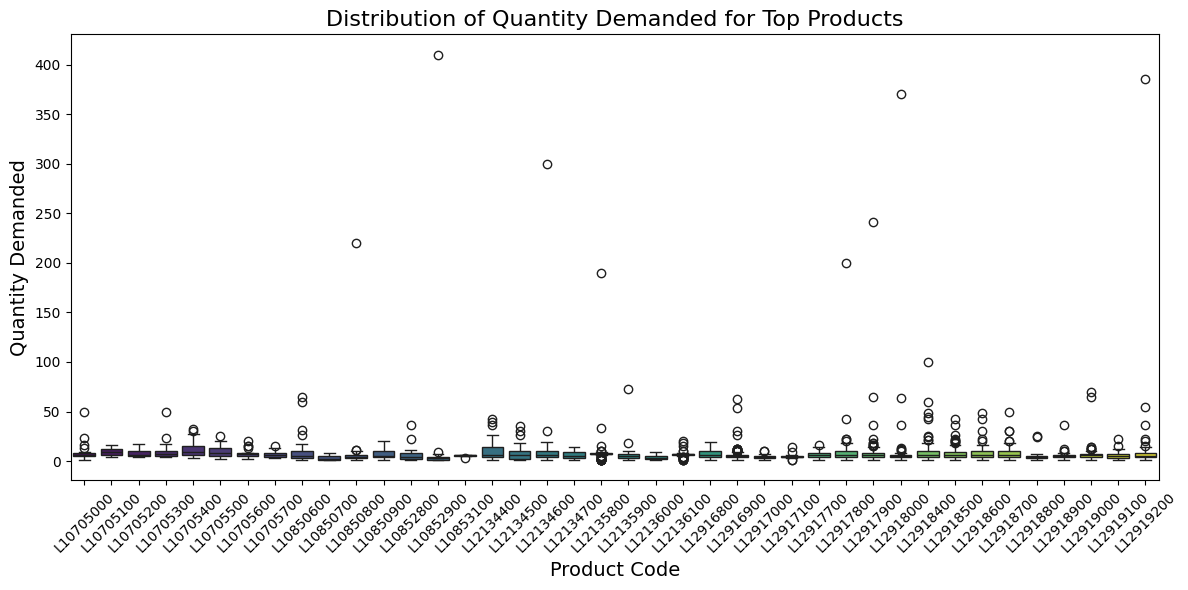

In [264]:
# Focus on the top 10 most ordered products for better readability
top_products = df['Product Code'].unique()
filtered_data = df[df['Product Code'].isin(top_products)]

# Create a boxplot for the top products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Code', y='items', data=filtered_data, palette='viridis')
plt.title("Distribution of Quantity Demanded for Top Products", fontsize=16)
plt.xlabel("Product Code", fontsize=14)
plt.ylabel("Quantity Demanded", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate product codes for better readability
plt.tight_layout()
plt.show()

In [265]:
# Step 2: Group by Product Code and compute quantiles for lead time
lead_time_quantiles = df.groupby('Product Code')['Lead Time'].apply(
    lambda x: pd.Series(mquantiles(x, prob=[0.25, 0.5, 0.75], alphap=0.4, betap=0.4), index=['25th', '50th', '75th'])
).unstack()

# Reset the index for better readability
lead_time_quantiles = lead_time_quantiles.reset_index()

In [266]:
lead_time_quantiles

,Product Code,25th,50th,75th
0,L10705000,181.20,195.0,201.40
1,L10705100,190.85,200.0,206.40
2,L10705200,191.00,195.0,202.10
3,L10705300,192.00,198.0,203.90
4,L10705400,192.00,199.0,203.00
5,L10705500,188.00,192.0,196.00
6,L10705600,189.35,197.5,203.55
7,L10705700,187.85,191.5,204.30
8,L10850600,181.50,212.0,232.80
9,L10850700,172.85,214.0,224.20


In [267]:
# Display the quantile data as a table
print(lead_time_quantiles)

   Product Code    25th   50th    75th
0     L10705000  181.20  195.0  201.40
1     L10705100  190.85  200.0  206.40
2     L10705200  191.00  195.0  202.10
3     L10705300  192.00  198.0  203.90
4     L10705400  192.00  199.0  203.00
5     L10705500  188.00  192.0  196.00
6     L10705600  189.35  197.5  203.55
7     L10705700  187.85  191.5  204.30
8     L10850600  181.50  212.0  232.80
9     L10850700  172.85  214.0  224.20
10    L10850800  170.00  191.5  219.10
11    L10850900  216.95  240.0  258.20
12    L10852800  185.50  221.5  237.00
13    L10852900  177.00  204.0  230.55
14    L10853100  239.80  260.0  299.50
15    L12134400  179.90  223.0  268.00
16    L12134500  149.70  227.0  270.20
17    L12134600  177.25  209.5  262.55
18    L12134700  181.95  197.0  225.05
19    L12135800  206.00  206.0  206.00
20    L12135900  183.80  208.5  231.10
21    L12136000  191.45  202.0  224.55
22    L12136100  206.00  206.0  229.25
23    L12916800  206.25  232.0  232.00
24    L12916900  198.45  

In [268]:
# Step 3: Visualize Lead Time Distribution for the Top Products
# Filter for top 10 products based on frequency
top_products = df['Product Code'].value_counts().head(10).index
filtered_data = df[df['Product Code'].isin(top_products)]

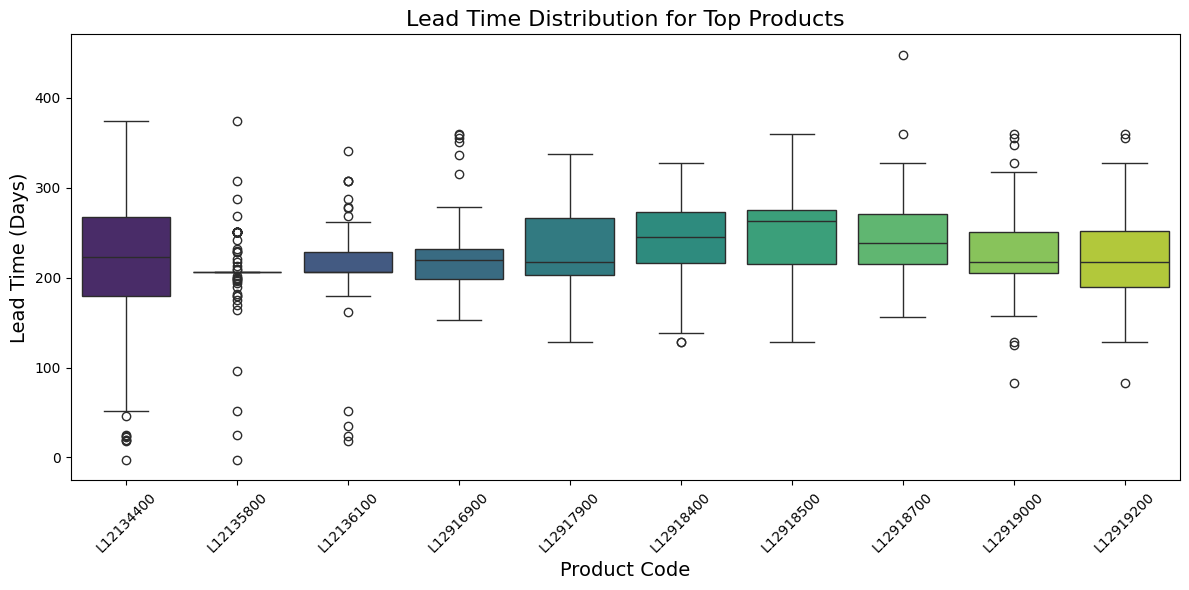

In [269]:
# Create a boxplot for lead time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Code', y='Lead Time', data=filtered_data, palette='viridis')
plt.title("Lead Time Distribution for Top Products", fontsize=16)
plt.xlabel("Product Code", fontsize=14)
plt.ylabel("Lead Time (Days)", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Q. No. 4

In [270]:
# Monte Carlo Simulation
# Define number of simulations
n_simulations = 1000

In [271]:
# Simulate random samples for lead time and quantity demanded
simulated_lead_times = np.random.choice(df['Lead Time'], size=n_simulations, replace=True)
simulated_quantities = np.random.choice(df['items'], size=n_simulations, replace=True)

In [272]:
# Consolidate simulation results
simulation_results = pd.DataFrame({
    'Simulated Lead Time': simulated_lead_times,
    'Simulated Quantity': simulated_quantities
})

In [273]:
# Step 4: Classify Demand as Advance or Urgent
# Define threshold for advance demand (e.g., > 30 days)
simulation_results['Demand Type'] = simulation_results['Simulated Lead Time'].apply(
    lambda x: 'Advance' if x > 30 else 'Urgent'
)

In [274]:
# Aggregate simulated demand by type
simulated_demand_summary = simulation_results.groupby('Demand Type')['Simulated Quantity'].sum()
print("Simulated Demand Summary:")
print(simulated_demand_summary)

Simulated Demand Summary:
Demand Type
Advance    9203
Urgent      485
Name: Simulated Quantity, dtype: int64


In [275]:
# Step 5: Compare Simulated Advance Demand with Actual Data
# Compute actual advance demand from dataset
actual_advance_demand = df[df['Lead Time'] > 30]['items'].sum()
simulated_advance_demand = simulated_demand_summary['Advance']

In [276]:
print(f"Actual Advance Demand: {actual_advance_demand}")
print(f"Simulated Advance Demand: {simulated_advance_demand}")

Actual Advance Demand: 16891
Simulated Advance Demand: 9203


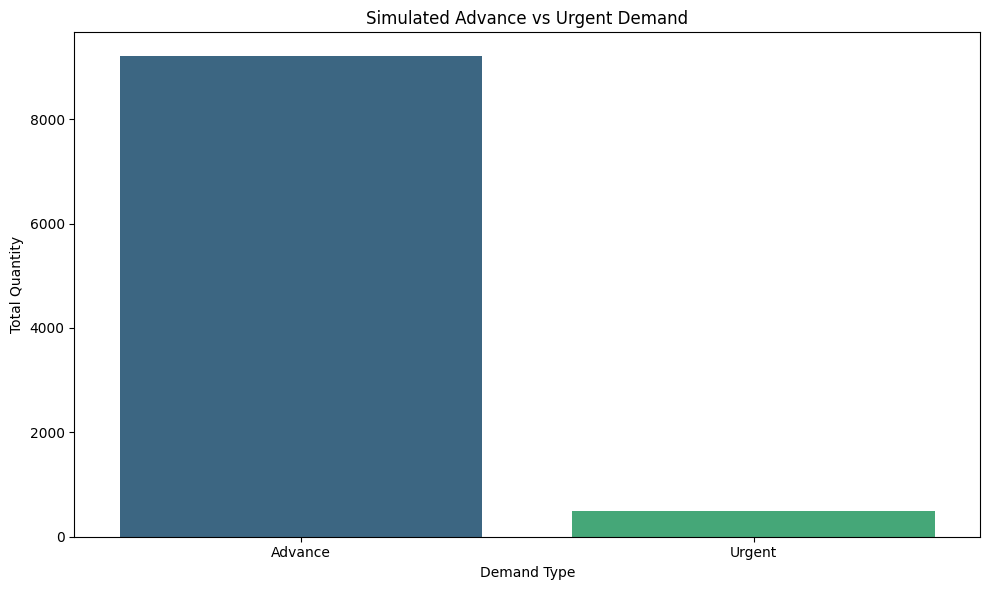

In [277]:
# Step 6: Visualize Results
plt.figure(figsize=(10, 6))
sns.barplot(x=simulated_demand_summary.index, y=simulated_demand_summary.values, palette='viridis')
plt.title("Simulated Advance vs Urgent Demand")
plt.xlabel("Demand Type")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()

Lead Time Summary:
 count    2072.000000
mean      220.269305
std        52.464560
min        -3.000000
25%       195.000000
50%       217.000000
75%       251.000000
max       448.000000
Name: Lead Time, dtype: float64


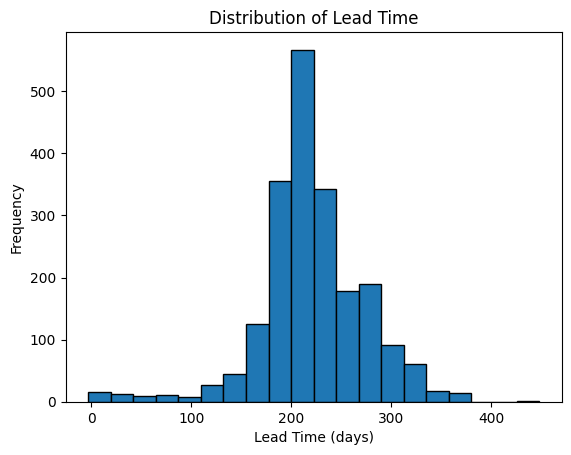

In [281]:
# Summary statistics for lead time
lead_time_summary = df['Lead Time'].describe()
print("Lead Time Summary:\n", lead_time_summary)

# Plot distribution of lead times (optional)
import matplotlib.pyplot as plt

plt.hist(df['Lead Time'], bins=20, edgecolor='k')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

In [282]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07


In [283]:
# Display the lead time table with relevant columns
lead_time_table = df[['Customer Order Code', 'order_date', 'requested_delivery_date', 'Lead Time']]
print(lead_time_table)

      Customer Order Code order_date requested_delivery_date  Lead Time
0              3200435553 2009-07-13              2010-01-28        199
1              3200435694 2009-07-15              2010-03-24        252
2              3200435741 2009-07-16              2010-02-04        203
3              3200435907 2009-07-17              2010-02-04        202
4              3200435963 2009-07-21              2010-02-01        195
...                   ...        ...                     ...        ...
2415           3200819196 2011-07-13              2012-02-15        217
2416           3200819201 2011-07-13              2012-02-15        217
2417           3200819206 2011-07-13              2012-02-15        217
2418           3200819210 2011-07-13              2012-02-15        217
2419           3200828659 2012-01-23              2012-04-15         83

[2072 rows x 4 columns]


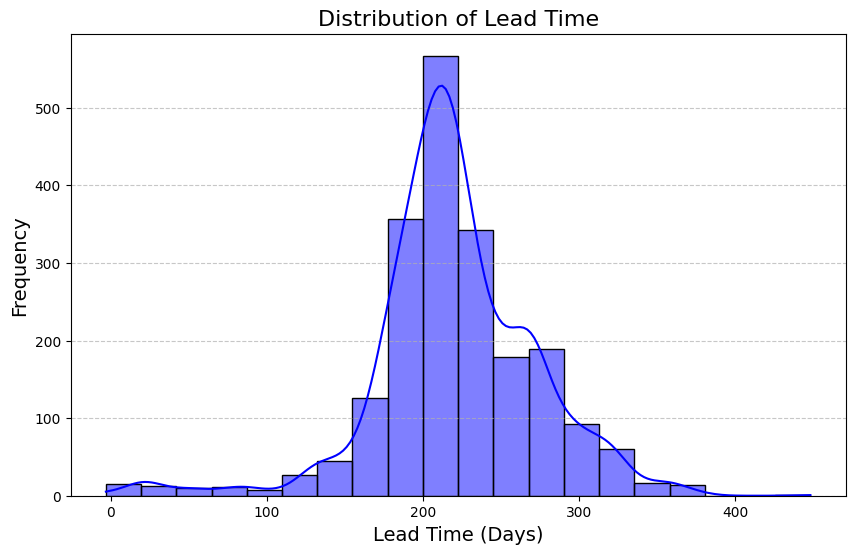

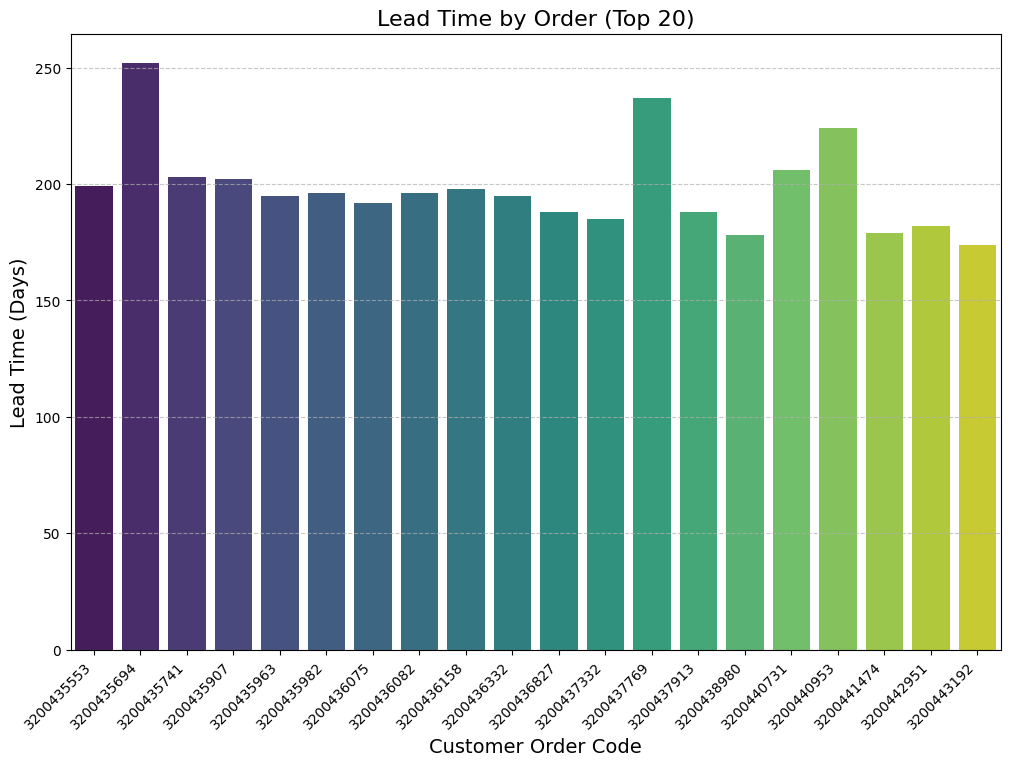

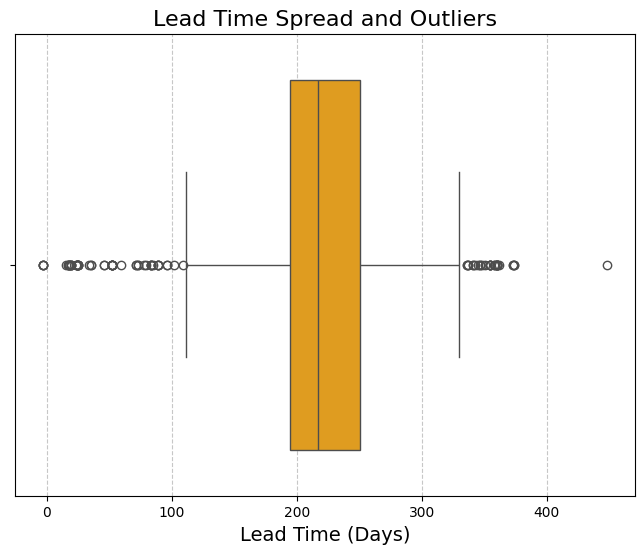

In [284]:
# Histogram to show lead time distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=lead_time_table, x='Lead Time', bins=20, kde=True, color='blue')
plt.title('Distribution of Lead Time', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar Chart for lead time per order (limited to top 20 orders for readability)
plt.figure(figsize=(12, 8))
top_orders = lead_time_table.head(20)  # Adjust the number of orders to visualize
sns.barplot(data=top_orders, x='Customer Order Code', y='Lead Time', palette='viridis')
plt.title('Lead Time by Order (Top 20)', fontsize=16)
plt.xlabel('Customer Order Code', fontsize=14)
plt.ylabel('Lead Time (Days)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box Plot to summarize lead time distribution and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=lead_time_table, x='Lead Time', color='orange')
plt.title('Lead Time Spread and Outliers', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()